# Logarithmic and Simple Returns Comparison

In [ ]:
# PREPARE IMPORTS
import pandas_datareader as pdr 
from pandas.tseries.offsets import Day, MonthEnd
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [4]:
# SETTING START AND END DATES
start = dt.datetime(2000,1,1)
start = start.strftime('%Y-%m-%d')
end = dt.datetime.today() - Day(2)
end = end.strftime('%Y-%m-%d')

In [8]:
data = pdr.get_data_yahoo('SPY', start=start)

In [10]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,148.25000,143.875000,148.25000,145.4375,8164300.0,98.564461
2000-01-04,144.06250,139.640625,143.53125,139.7500,8089800.0,94.709984
2000-01-05,141.53125,137.250000,139.93750,140.0000,12177900.0,94.879379
2000-01-06,141.50000,137.750000,139.62500,137.7500,6227200.0,93.354584
2000-01-07,145.75000,140.062500,140.31250,145.7500,8066500.0,98.776245


In [11]:
data.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-09-14,340.380005,334.220001,337.489990,338.459991,65605700.0,337.110535
2020-09-15,342.019989,338.470001,341.119995,340.170013,52920900.0,338.813751
2020-09-16,343.059998,338.519989,341.510010,338.820007,82096000.0,337.469116
2020-09-17,337.700012,332.989990,333.559998,335.839996,91523300.0,334.501007
2020-09-18,335.489990,327.970001,335.369995,330.649994,105790800.0,330.649994


In [13]:
# FILTER CLOSING PRICES
close = data.loc[:,['Adj Close']]

In [15]:
close.head()

,Adj Close
Date,
2000-01-03,98.564461
2000-01-04,94.709984
2000-01-05,94.879379
2000-01-06,93.354584
2000-01-07,98.776245


In [16]:
# ADD SIMPLE AND LOG RETURN COLUMNS
close['simple_returns'] = close['Adj Close'].pct_change()
close['log_returns'] = np.log(data['Adj Close']) - np.log(data['Adj Close'].shift(1))
close = close.dropna()

In [17]:
close.head()

,Adj Close,simple_returns,log_returns
Date,,,
2000-01-04,94.709984,-0.039106,-0.039891
2000-01-05,94.879379,0.001789,0.001787
2000-01-06,93.354584,-0.016071,-0.016201
2000-01-07,98.776245,0.058076,0.056452
2000-01-10,99.115105,0.003431,0.003425


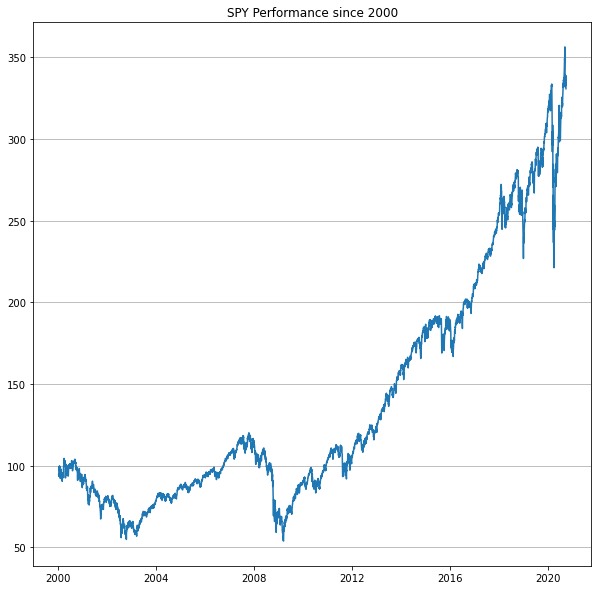

In [19]:
# PLOT STOCK PERFORMANCE
fig = plt.figure(figsize=(10,10))
ax = fig.subplots()
plt.plot(close['Adj Close'])
plt.grid(axis='y')
plt.title('SPY Performance since 2000')
plt.show()
plt.clf()
plt.close()

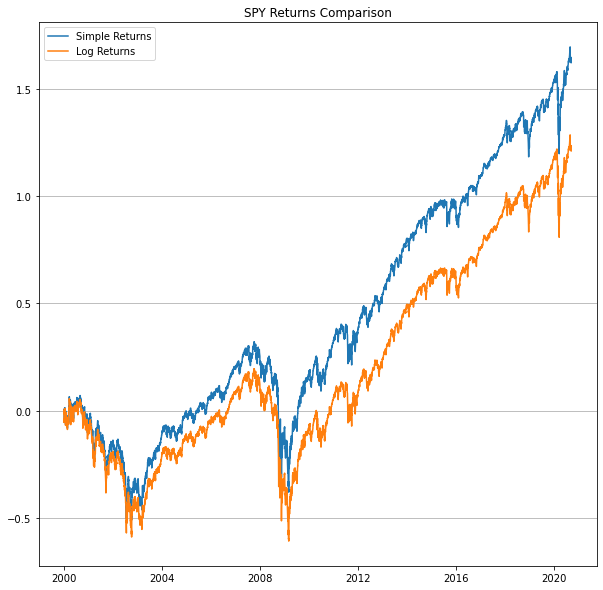

In [21]:
# COMPARISON BETWEEN LOG AND SIMPLE RETURNS
fig2 = plt.figure(figsize=(10,10))
ax2 = fig2.subplots()
plt.plot(close['simple_returns'].cumsum())
plt.plot(close['log_returns'].cumsum())
plt.grid(axis='y')
plt.legend(['Simple Returns', 'Log Returns'])
plt.title('SPY Returns Comparison')
plt.show()
plt.clf()
plt.close()

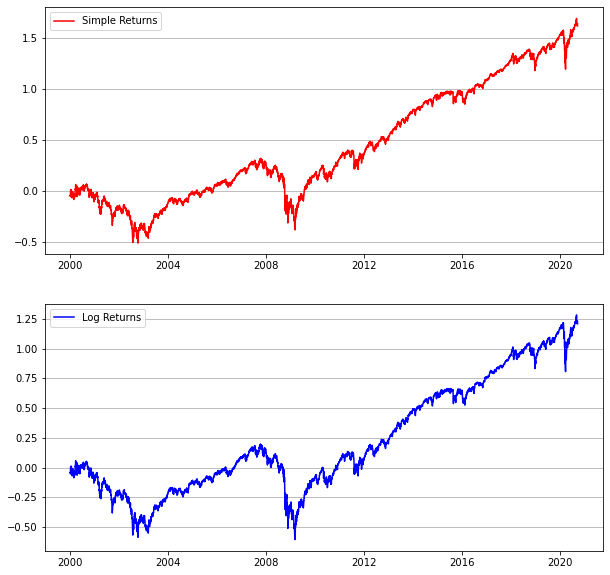

In [22]:
# SUBPLOTS WITH LOG AND SIMPLE RETURNS
fig3 = plt.figure(figsize=(10,10))
ax3 = fig3.subplots()
plt.subplot(2,1,1)
plt.plot(close['simple_returns'].cumsum(),'red')
plt.grid(axis='y')
plt.legend(['Simple Returns'])
plt.subplot(2,1,2)
plt.plot(close['log_returns'].cumsum(), 'blue')
plt.grid(axis='y')
plt.legend(['Log Returns'])
plt.show()
plt.close()

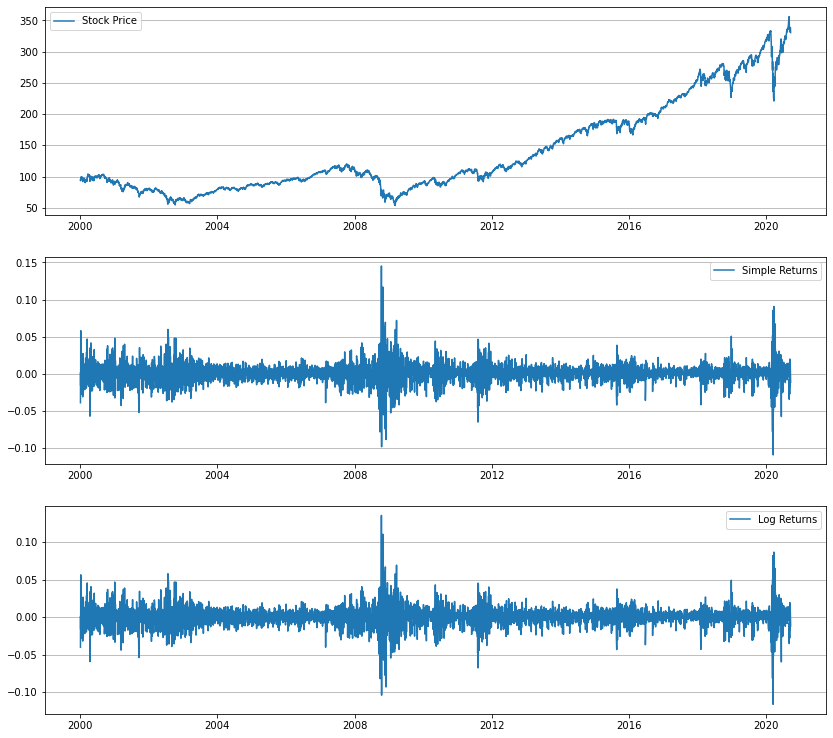

In [23]:
# COMPLETE SUBPLOTS WITH LOG AND SIMPLE RETURNS
fig5 = plt.figure(figsize=(14,13))
plt.subplot(3,1,1)
plt.plot(close['Adj Close'])
plt.grid(axis='y')
plt.legend(['Stock Price'])
plt.subplot(3,1,2)
plt.plot(close['simple_returns'])
plt.grid(axis='y')
plt.legend(['Simple Returns'])
plt.subplot(3,1,3)
plt.plot(close['log_returns'])
plt.legend(['Log Returns'])
plt.grid(axis='y')
plt.show()

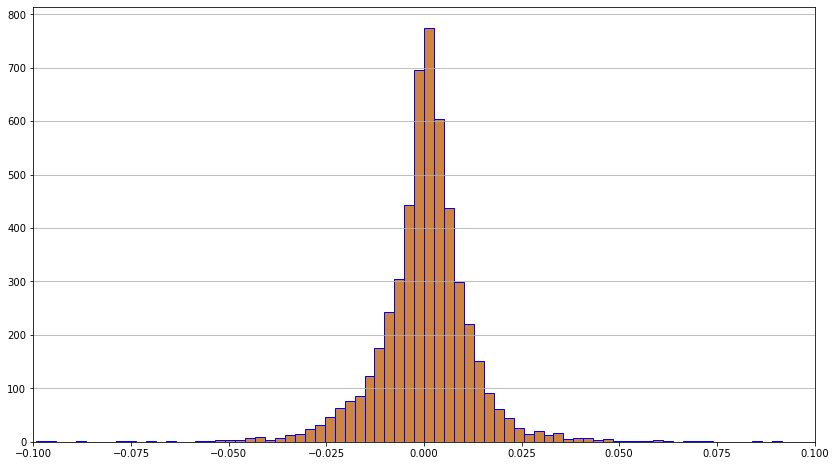

In [24]:
# HISTOGRAM OF RETURNS
fig6 = plt.figure(figsize=(14,8))
plt.subplot(1,1,1)
plt.hist(close['simple_returns'],facecolor='peru',edgecolor='blue',bins=100)
plt.xlim([-0.1,0.1])
plt.grid(axis='y')
plt.show()
plt.close()